In [1]:
%load_ext autoreload

In [2]:
%aimport discriminator.discriminator_wrapper
%aimport discriminator.discriminator 
%aimport discriminator.discriminator_attend_text 
from discriminator.discriminator_wrapper import DiscriminatorWrapper, plot_losses
from coco_utils import load_coco_data_struct
import tensorflow as tf
import numpy as np
%autoreload 1

Using TensorFlow backend.


### Load data

In [3]:
attention_mode = False
learner = DiscriminatorWrapper.vanilla_classification_type_key
if attention_mode:
    vocab_data, train_data, _ = load_coco_data_struct(base_dir="datasets/self_process", 
                                                             source_image_features='block5_conv4_max_pooled',
                                                             is_caption_separated=True,
                                                             mock_val=True)
    val_data, train_data = train_data.split(0.3)
else:
    vocab_data, train_data, val_data = load_coco_data_struct()


Loaded vocab data.
Embedding <class 'numpy.ndarray'> (1004, 304) float64
Word to index <class 'dict'> 1004
Index to word <class 'list'> 1004

Loaded train data.
Captions <class 'numpy.ndarray'> (400135, 17) int32
Image indices <class 'numpy.ndarray'> (400135,) int32
Image features <class 'numpy.ndarray'> (82783, 4096) float32
Image urls <class 'numpy.ndarray'> (82783,) <U63

Loaded val data.
Captions <class 'numpy.ndarray'> (195954, 17) int32
Image indices <class 'numpy.ndarray'> (195954,) int32
Image features <class 'numpy.ndarray'> (40504, 4096) float32
Image urls <class 'numpy.ndarray'> (40504,) <U63


### Pretrain and save

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
disc = DiscriminatorWrapper(train_data, val_data, vocab_data, learner_type=learner)
tf.global_variables_initializer().run()

Building learner vanilla_cls...
Building classification
map:  {'secondary_loss': <tf.Tensor 'Const_2:0' shape=() dtype=float32>}


In [5]:
batch_size = 1
iter_num = 1
train_loss, val_loss = disc.pre_train(sess, iter_num=iter_num, batch_size=batch_size)

iter 0, loss: 1.8273807764053345
train accuracy: 0.5
[[0 1]
 [0 1]]


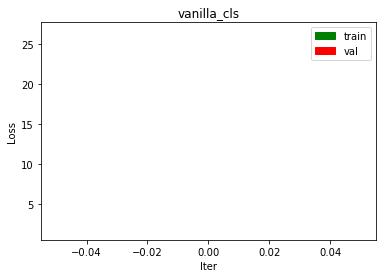

In [6]:
plot_losses(train_loss, val_loss, title=learner)

val accuracy: 0.5
[[10  0]
 [10  0]]
P/G: 0/1.0 | Avg reward: 0.0037380135618150234


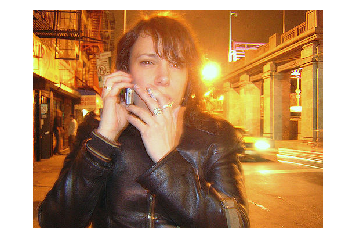

a               0.0037
woman           0.0037
holding         0.0037
a               0.0037
cellphone       0.0037
up              0.0037
to              0.0037
her             0.0037
ear             0.0037
in              0.0037
a               0.0037
street          0.0037
<END>           0.0037
- - - -
P/G: 0/1.0 | Avg reward: 6.812534368457033e-26


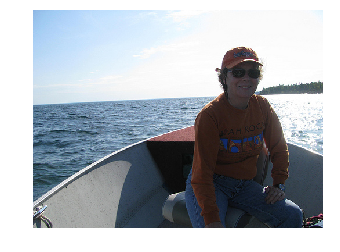

a               6.8e-26
woman           6.8e-26
riding          6.8e-26
in              6.8e-26
a               6.8e-26
boat            6.8e-26
on              6.8e-26
a               6.8e-26
sunny           6.8e-26
day             6.8e-26
<END>           6.8e-26
- - - -
P/G: 0/1.0 | Avg reward: 2.1452712051651978e-18


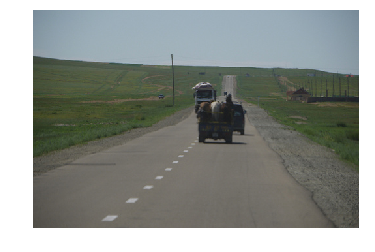

three           2.1e-18
vehicles        2.1e-18
driving         2.1e-18
down            2.1e-18
a               2.1e-18
road            2.1e-18
with            2.1e-18
one             2.1e-18
carrying        2.1e-18
some            2.1e-18
animals         2.1e-18
<END>           2.1e-18
- - - -
P/G: 0/1.0 | Avg reward: 2.3236332969507265e-15


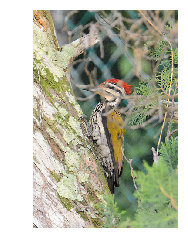

a               2.3e-15
bird            2.3e-15
is              2.3e-15
perched         2.3e-15
on              2.3e-15
the             2.3e-15
side            2.3e-15
of              2.3e-15
a               2.3e-15
tree            2.3e-15
trunk           2.3e-15
<END>           2.3e-15
- - - -
P/G: 0/1.0 | Avg reward: 2.3946800775290454e-29


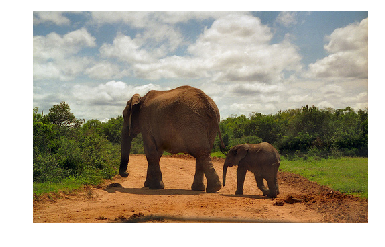

a               2.4e-29
mother          2.4e-29
elephant        2.4e-29
leading         2.4e-29
a               2.4e-29
baby            2.4e-29
elephant        2.4e-29
on              2.4e-29
a               2.4e-29
clear           2.4e-29
day             2.4e-29
<END>           2.4e-29
- - - -
P/G: 0/1.0 | Avg reward: 6.048672401227527e-23


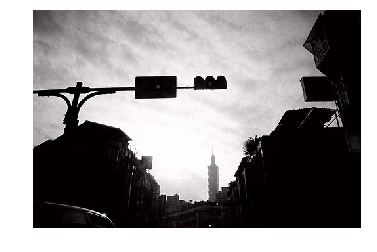

a               6e-23
black           6e-23
and             6e-23
white           6e-23
photograph      6e-23
of              6e-23
a               6e-23
stop            6e-23
light           6e-23
from            6e-23
the             6e-23
street          6e-23
<END>           6e-23
- - - -
P/G: 0/1.0 | Avg reward: 1.2150702027923042e-14


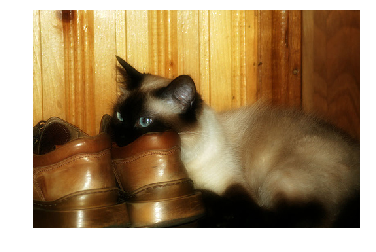

a               1.2e-14
cat             1.2e-14
who             1.2e-14
is              1.2e-14
<UNK>           1.2e-14
next            1.2e-14
to              1.2e-14
a               1.2e-14
pair            1.2e-14
of              1.2e-14
shoes           1.2e-14
<END>           1.2e-14
- - - -
P/G: 0/1.0 | Avg reward: 8.448070720805798e-22


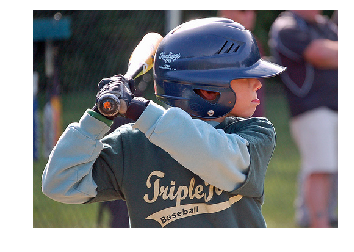

small           8.4e-22
boy             8.4e-22
in              8.4e-22
baseball        8.4e-22
uniform         8.4e-22
holding         8.4e-22
bat             8.4e-22
up              8.4e-22
to              8.4e-22
his             8.4e-22
head            8.4e-22
<END>           8.4e-22
- - - -
P/G: 0/1.0 | Avg reward: 5.4742339133939666e-11


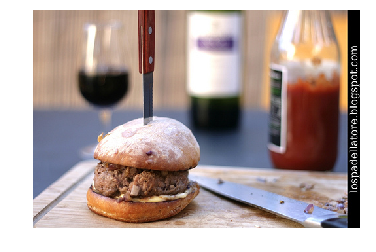

a               5.5e-11
<UNK>           5.5e-11
is              5.5e-11
<UNK>           5.5e-11
with            5.5e-11
a               5.5e-11
knife           5.5e-11
on              5.5e-11
a               5.5e-11
cutting         5.5e-11
board           5.5e-11
<END>           5.5e-11
- - - -
P/G: 0/1.0 | Avg reward: 5.994947871457157e-10


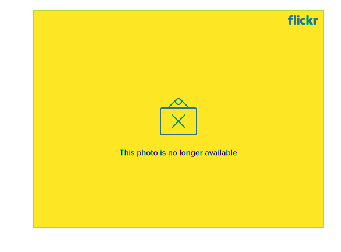

a               6e-10
blurry          6e-10
image           6e-10
of              6e-10
a               6e-10
<UNK>           6e-10
<UNK>           6e-10
with            6e-10
a               6e-10
big             6e-10
screen          6e-10
<END>           6e-10
- - - -
P/G: 0/0.0 | Avg reward: 1.2708682334050536e-05


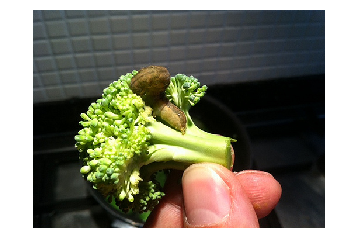

a               1.3e-05
sink            1.3e-05
with            1.3e-05
<UNK>           1.3e-05
<UNK>           1.3e-05
<UNK>           1.3e-05
this            1.3e-05
bathroom        1.3e-05
<END>           1.3e-05
- - - -
P/G: 0/0.0 | Avg reward: 2.793172758554464e-33


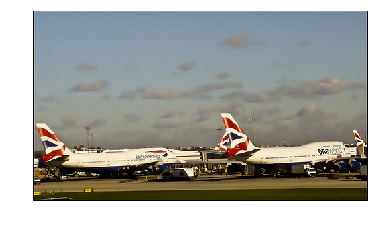

a               2.8e-33
sign            2.8e-33
is              2.8e-33
shown           2.8e-33
at              2.8e-33
the             2.8e-33
edge            2.8e-33
of              2.8e-33
a               2.8e-33
street          2.8e-33
<END>           2.8e-33
- - - -
P/G: 0/0.0 | Avg reward: 1.5872469114421147e-24


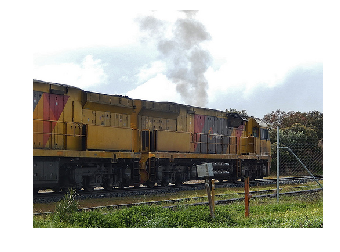

a               1.6e-24
black           1.6e-24
<UNK>           1.6e-24
is              1.6e-24
sitting         1.6e-24
in              1.6e-24
the             1.6e-24
table           1.6e-24
<END>           1.6e-24
- - - -
P/G: 0/0.0 | Avg reward: 0.1162734404206276


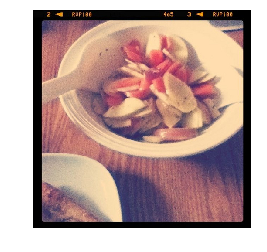

man             0.12
playing         0.12
tennis          0.12
holding         0.12
holding         0.12
a               0.12
tennis          0.12
racket          0.12
<END>           0.12
- - - -
P/G: 0/0.0 | Avg reward: 4.037127771458956e-17


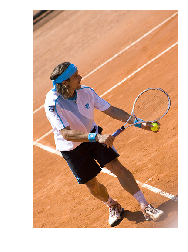

decorated       4e-17
cake            4e-17
sitting         4e-17
on              4e-17
a               4e-17
plate           4e-17
atop            4e-17
a               4e-17
box             4e-17
<END>           4e-17
- - - -
P/G: 0/0.0 | Avg reward: 1.2013261065200632e-22


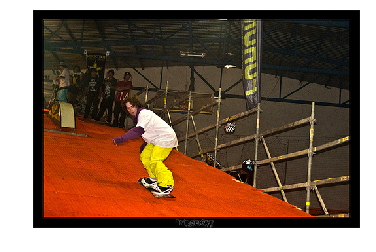

the             1.2e-22
<UNK>           1.2e-22
bag             1.2e-22
shows           1.2e-22
<UNK>           1.2e-22
for             1.2e-22
the             1.2e-22
parking         1.2e-22
meter           1.2e-22
<END>           1.2e-22
- - - -
P/G: 0/0.0 | Avg reward: 2.553221938419929e-28


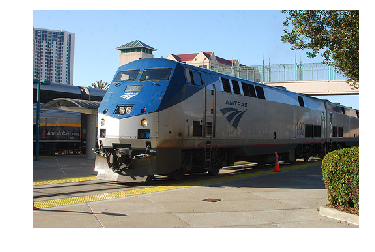

a               2.6e-28
big             2.6e-28
baseball        2.6e-28
<UNK>           2.6e-28
where           2.6e-28
a               2.6e-28
player          2.6e-28
is              2.6e-28
about           2.6e-28
to              2.6e-28
hit             2.6e-28
the             2.6e-28
ball            2.6e-28
<END>           2.6e-28
- - - -
P/G: 0/0.0 | Avg reward: 3.279806001848184e-26


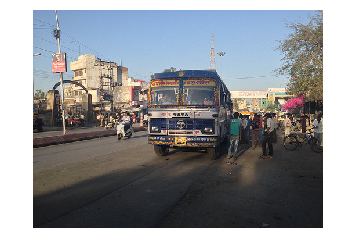

a               3.3e-26
woman           3.3e-26
sitting         3.3e-26
on              3.3e-26
a               3.3e-26
metal           3.3e-26
bench           3.3e-26
playing         3.3e-26
an              3.3e-26
<UNK>           3.3e-26
with            3.3e-26
<UNK>           3.3e-26
<END>           3.3e-26
- - - -
P/G: 0/0.0 | Avg reward: 6.280810179213842e-20


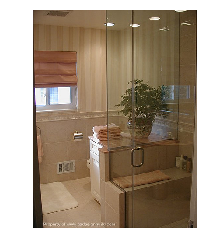

a               6.3e-20
very            6.3e-20
big             6.3e-20
pizza           6.3e-20
on              6.3e-20
a               6.3e-20
white           6.3e-20
plate           6.3e-20
on              6.3e-20
a               6.3e-20
table           6.3e-20
with            6.3e-20
many            6.3e-20
people          6.3e-20
<END>           6.3e-20
- - - -
P/G: 0/0.0 | Avg reward: 9.851349415802456e-24


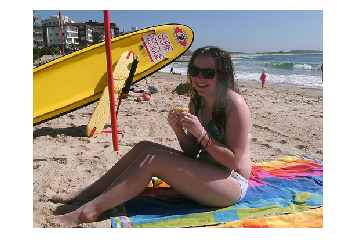

a               9.9e-24
city            9.9e-24
with            9.9e-24
people          9.9e-24
on              9.9e-24
a               9.9e-24
<UNK>           9.9e-24
and             9.9e-24
in              9.9e-24
a               9.9e-24
grass           9.9e-24
field           9.9e-24
<END>           9.9e-24
- - - -


19.026459

In [7]:
disc.examine_validation(sess, batch_size=10, to_examine=True, print_acc=True)

In [8]:
model_name = "discriminator2"
disc.save_model(sess, model_name=model_name)

### Assign rewards

P/G: 0/1.0 | Avg reward: 3.3648130948193966e-09


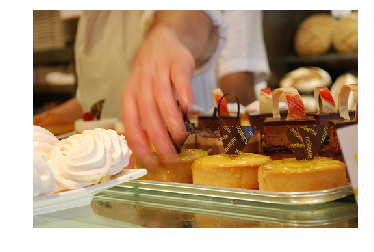

beautiful       3.4e-09
pastries        3.4e-09
with            3.4e-09
hand            3.4e-09
- - - -
P/G: 0/1.0 | Avg reward: 1.4590774403033975e-14


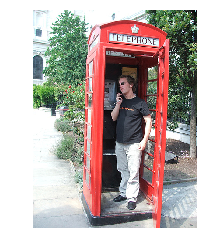

a               1.5e-14
man             1.5e-14
in              1.5e-14
black           1.5e-14
<UNK>           1.5e-14
in              1.5e-14
red             1.5e-14
phone           1.5e-14
<UNK>           1.5e-14
- - - -
P/G: 0/1.0 | Avg reward: 3.598425735162891e-07


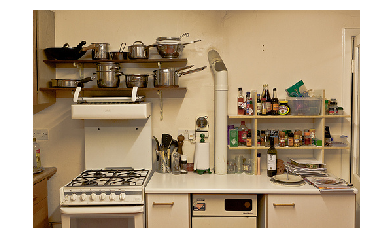

cat             3.6e-07
dogs            3.6e-07
one             3.6e-07
<UNK>           3.6e-07
- - - -


In [9]:
train_image_idx = np.array([1, 2, 3])
captions = np.array(["beautiful pastries with hand", "a man in black t-shirt in red phone booth", "cat dogs one helloo"])
_, rewards, avg_reward = disc.assign_reward(sess, 
                                   train_image_idx, 
                                   captions,
                                   image_idx_from_training=True, 
                                   to_examine=True)
assert rewards.shape[0] == len(train_image_idx)
sess.close()

### Load Model

In [10]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
loaded_disc = DiscriminatorWrapper(train_data, val_data, vocab_data,
                                   load_session=sess,
                                   saved_model_name=model_name,
                                   learner_type=learner)
                                   

INFO:tensorflow:Restoring parameters from models/discr/discriminator2
Building learner vanilla_cls...
map:  {'secondary_loss': None}


In [11]:
_, rewards_after_loaded, _ = loaded_disc.assign_reward(sess, 
                                                       train_image_idx, 
                                                       captions,
                                                       image_idx_from_training=True, 
                                                       to_examine=False)

assert np.array_equal(rewards, rewards_after_loaded), "Loaded model should assign same rewards as trained model"

In [12]:
loaded_disc.examine_validation(sess, batch_size=5, to_examine=False, print_acc=True)

val accuracy: 0.5
[[5 0]
 [5 0]]


12.018137

### Online train

In [13]:
online_all_loss, online_val_loss = loaded_disc.online_train(sess, iter_num=10, img_idxs=train_image_idx,
                                                            caption_sentences=captions)

iter 0, loss: 12.313469886779785
train accuracy: 0.5
[[3 0]
 [3 0]]
